In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


import os
import numpy as np
import math

from Stationary.core import *
from utils.dataset_utils import *
from model.model_creation import *
from model.model_train import *

from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

import torch.nn.functional as F
import copy

from collections import defaultdict

from torch.autograd import Variable





np.random.seed(0)
torch.manual_seed(0)

In [2]:
test_family = 'NonLinearModel_NonLinearTask'
test_name = 'test8'

In [3]:
import concurrent.futures
import multiprocessing as mp

from generator import *

iterations = 5

if __name__ == '__main__':
  
    SEEDS = np.linspace(1, iterations, iterations, dtype=int).tolist()

    error_list = []
    score_list = []
    error_list_fedavg = []
    score_list_fedavg = []

    with concurrent.futures.ProcessPoolExecutor(max_workers=mp.cpu_count(), mp_context=mp.get_context("spawn")) as executor:
            for error, score, error_fedavg, score_fedavg in executor.map(single_iteration, SEEDS):
                error_list.append(error)
                score_list.append(score)
                error_list_fedavg.append(error_fedavg)
                score_list_fedavg.append(score_fedavg)

In [4]:
err = []
err_std = []
for i in range(0, len(error_list[0])):
    s = 0
    e = []
    for k in error_list:
        s += k[i]
        e.append(k[i])
    err.append(s / len(error_list))
    err_std.append(np.std(e))

sc = []
sc_std = []
for i in range(0, len(score_list[0])):
    s = 0
    e = []
    for k in score_list:
        s += k[i]
        e.append(k[i])
    sc.append(s / len(score_list))
    sc_std.append(np.std(e))

err_s = []
err_s_std = []
for i in range(0, len(error_list_fedavg[0])):
    s = 0
    e = []
    for k in error_list_fedavg:
        s += k[i]
        e.append(k[i])
    err_s.append(s / len(error_list_fedavg))
    err_s_std.append(np.std(e))

sc_s = []
sc_s_std = []
for i in range(0, len(score_list_fedavg[0])):
    s = 0
    e = []
    for k in score_list_fedavg:
        s += k[i]
        e.append(k[i])
    sc_s.append(s / len(score_list_fedavg))
    sc_s_std.append(np.std(e))

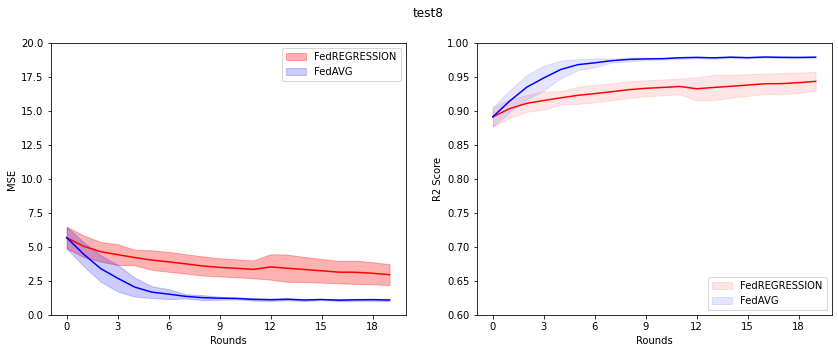

In [5]:
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator

#plt.figure(figsize=(20,5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle(test_name)


x = np.arange(len(error_list[0]))

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))


ax1.fill_between(x, np.array(err)+np.array(err_std), np.array(err)-np.array(err_std), color='red', label='FedREGRESSION', alpha=0.3)
ax1.fill_between(x, np.array(err_s)+np.array(err_s_std), np.array(err_s)-np.array(err_s_std), color='blue', label='FedAVG', alpha=0.2)
ax1.plot(x, err, color='red')
ax1.plot(x, err_s, color='blue')

ax1.legend(loc='upper right')

ax1.set_xlabel("Rounds")
ax1.set_ylabel("MSE")


ax1.set_ylim(ymin=0, ymax=20)


ax2.fill_between(x, np.array(sc)+np.array(sc_std), np.array(sc)-np.array(sc_std), color='red', label='FedREGRESSION', alpha=0.1)
ax2.fill_between(x, np.array(sc_s)+np.array(sc_s_std), np.array(sc_s)-np.array(sc_s_std), color='blue', label='FedAVG', alpha=0.1)
ax2.plot(x, sc, color='red')
ax2.plot(x, sc_s, color='blue')
ax2.legend(loc='lower right')

ax2.set_xlabel("Rounds")
ax2.set_ylabel("R2 Score")
ax2.set_ylim(ymin=0.6, ymax=1)




plt.draw()

plt.savefig("Results/Stationary/"+test_family+"/plots/"+test_name+"_.svg")

In [6]:
import pandas as pd


d = {'Error_FedREG': err, 
     'Error_FedREG_std': err_std,
     'Score_FedREG': sc, 
     'Score_FedREG_std': sc_std,
     'Error_FedAVG': err_s, 
     'Error_FedAVG_std': err_s_std,
     'Score_FedAVG': sc_s, 
     'Score_FedAVG_std': sc_s_std}

df = pd.DataFrame(data=d)

df.to_csv("Results/Stationary/"+test_family+"/data/"+test_name+"_.csv", index=False)

In [7]:
pd.read_csv("Results/Stationary/"+test_family+"/data/"+test_name+"_.csv")

,Error_FedREG,Error_FedREG_std,Score_FedREG,Score_FedREG_std,Error_FedAVG,Error_FedAVG_std,Score_FedAVG,Score_FedAVG_std
0,5.673830,0.803581,0.891353,0.014383,5.673830,0.803581,0.891353,0.014383
1,5.042170,0.790288,0.903507,0.013812,4.457213,0.882142,0.914759,0.015685
2,4.639582,0.720772,0.911224,0.012393,3.401072,0.973371,0.935010,0.017917
3,4.424890,0.764249,0.915351,0.013316,2.693034,0.975880,0.948569,0.018111
4,4.214132,0.570956,0.919341,0.009687,2.040168,0.699345,0.961012,0.012993
5,4.027413,0.722840,0.922963,0.012644,1.668371,0.436394,0.968086,0.008065
6,3.895159,0.727347,0.925492,0.012893,1.522296,0.363098,0.970848,0.006781
7,3.748004,0.712239,0.928317,0.012566,1.356852,0.157072,0.974007,0.002803
8,3.592622,0.703431,0.931294,0.012453,1.262358,0.184967,0.975836,0.003218
9,3.487785,0.664786,0.933295,0.011745,1.221828,0.107956,0.976591,0.001806
